In [1]:
!pip install git+git://github.com/JohannesSMHI/satpy.git@2cfce51d492a70c35454831c45288c7d6e86aa64

  Cloning git://github.com/JohannesSMHI/satpy.git (to revision 2cfce51d492a70c35454831c45288c7d6e86aa64) to /tmp/pip-req-build-2rhsrbkm
  Running command git clone -q git://github.com/JohannesSMHI/satpy.git /tmp/pip-req-build-2rhsrbkm
  Running command git rev-parse -q --verify 'sha^2cfce51d492a70c35454831c45288c7d6e86aa64'
  Running command git fetch -q git://github.com/JohannesSMHI/satpy.git 2cfce51d492a70c35454831c45288c7d6e86aa64
  Running command git checkout -q 2cfce51d492a70c35454831c45288c7d6e86aa64
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 42 kB 176 kB/s eta 0:00:01
     |████████████████████████████████| 3.4 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 140 kB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 912 kB/s  eta 0:00:01
     |████████████████████████████████| 212 kB 9.0 MB/s eta 0:00:01
     |████████████████

In [2]:
import numpy as np
from datetime import datetime
from satpy import Scene, find_files_and_readers

files = find_files_and_readers(
    start_time=datetime(2005, 7, 10, 7, 10),
    end_time=datetime(2005, 7, 10, 12, 50),
    base_dir='/kaggle/input/meris-sen3-data/meris_data',
    reader='meris_nc_sen3',
    sensor='meris',
)

scn = Scene(filenames=files)

In [3]:
datasets = [
    'M07',
    'chl_nn',
    'chl_oc4me',
    'iop_nn',
    'trsp',
    'tsm_nn',
    'mask'
]
scn.load(datasets)

In [4]:
scn['chl_nn']

<xarray.DataArray 'CHL_NN' (y: 7681, x: 4481)>
dask.array<open_dataset-38eb3fe9925d36c103dd031e01b9d5b3CHL_NN, shape=(7681, 4481), dtype=float32, chunksize=(4096, 4096), chunktype=numpy.ndarray>
Coordinates:
    crs      object +proj=latlong +datum=WGS84 +ellps=WGS84 +type=crs
Dimensions without coordinates: y, x
Attributes: (12/13)
    long_name:            log10 scaled (Neural Net) Algal pigment concentration
    units:                lg(re mg.m-3)
    platform_name:        Environmental Satellite
    sensor:               meris
    name:                 chl_nn
    resolution:           300
    ...                   ...
    modifiers:            ()
    start_time:           2005-07-10 09:38:05
    end_time:             2005-07-10 09:43:43
    area:                 Shape: (7681, 4481)\nLons: <xarray.DataArray 'longi...
    _satpy_id:            DataID(name='chl_nn', resolution=300, calibration=<...
    ancillary_variables:  []

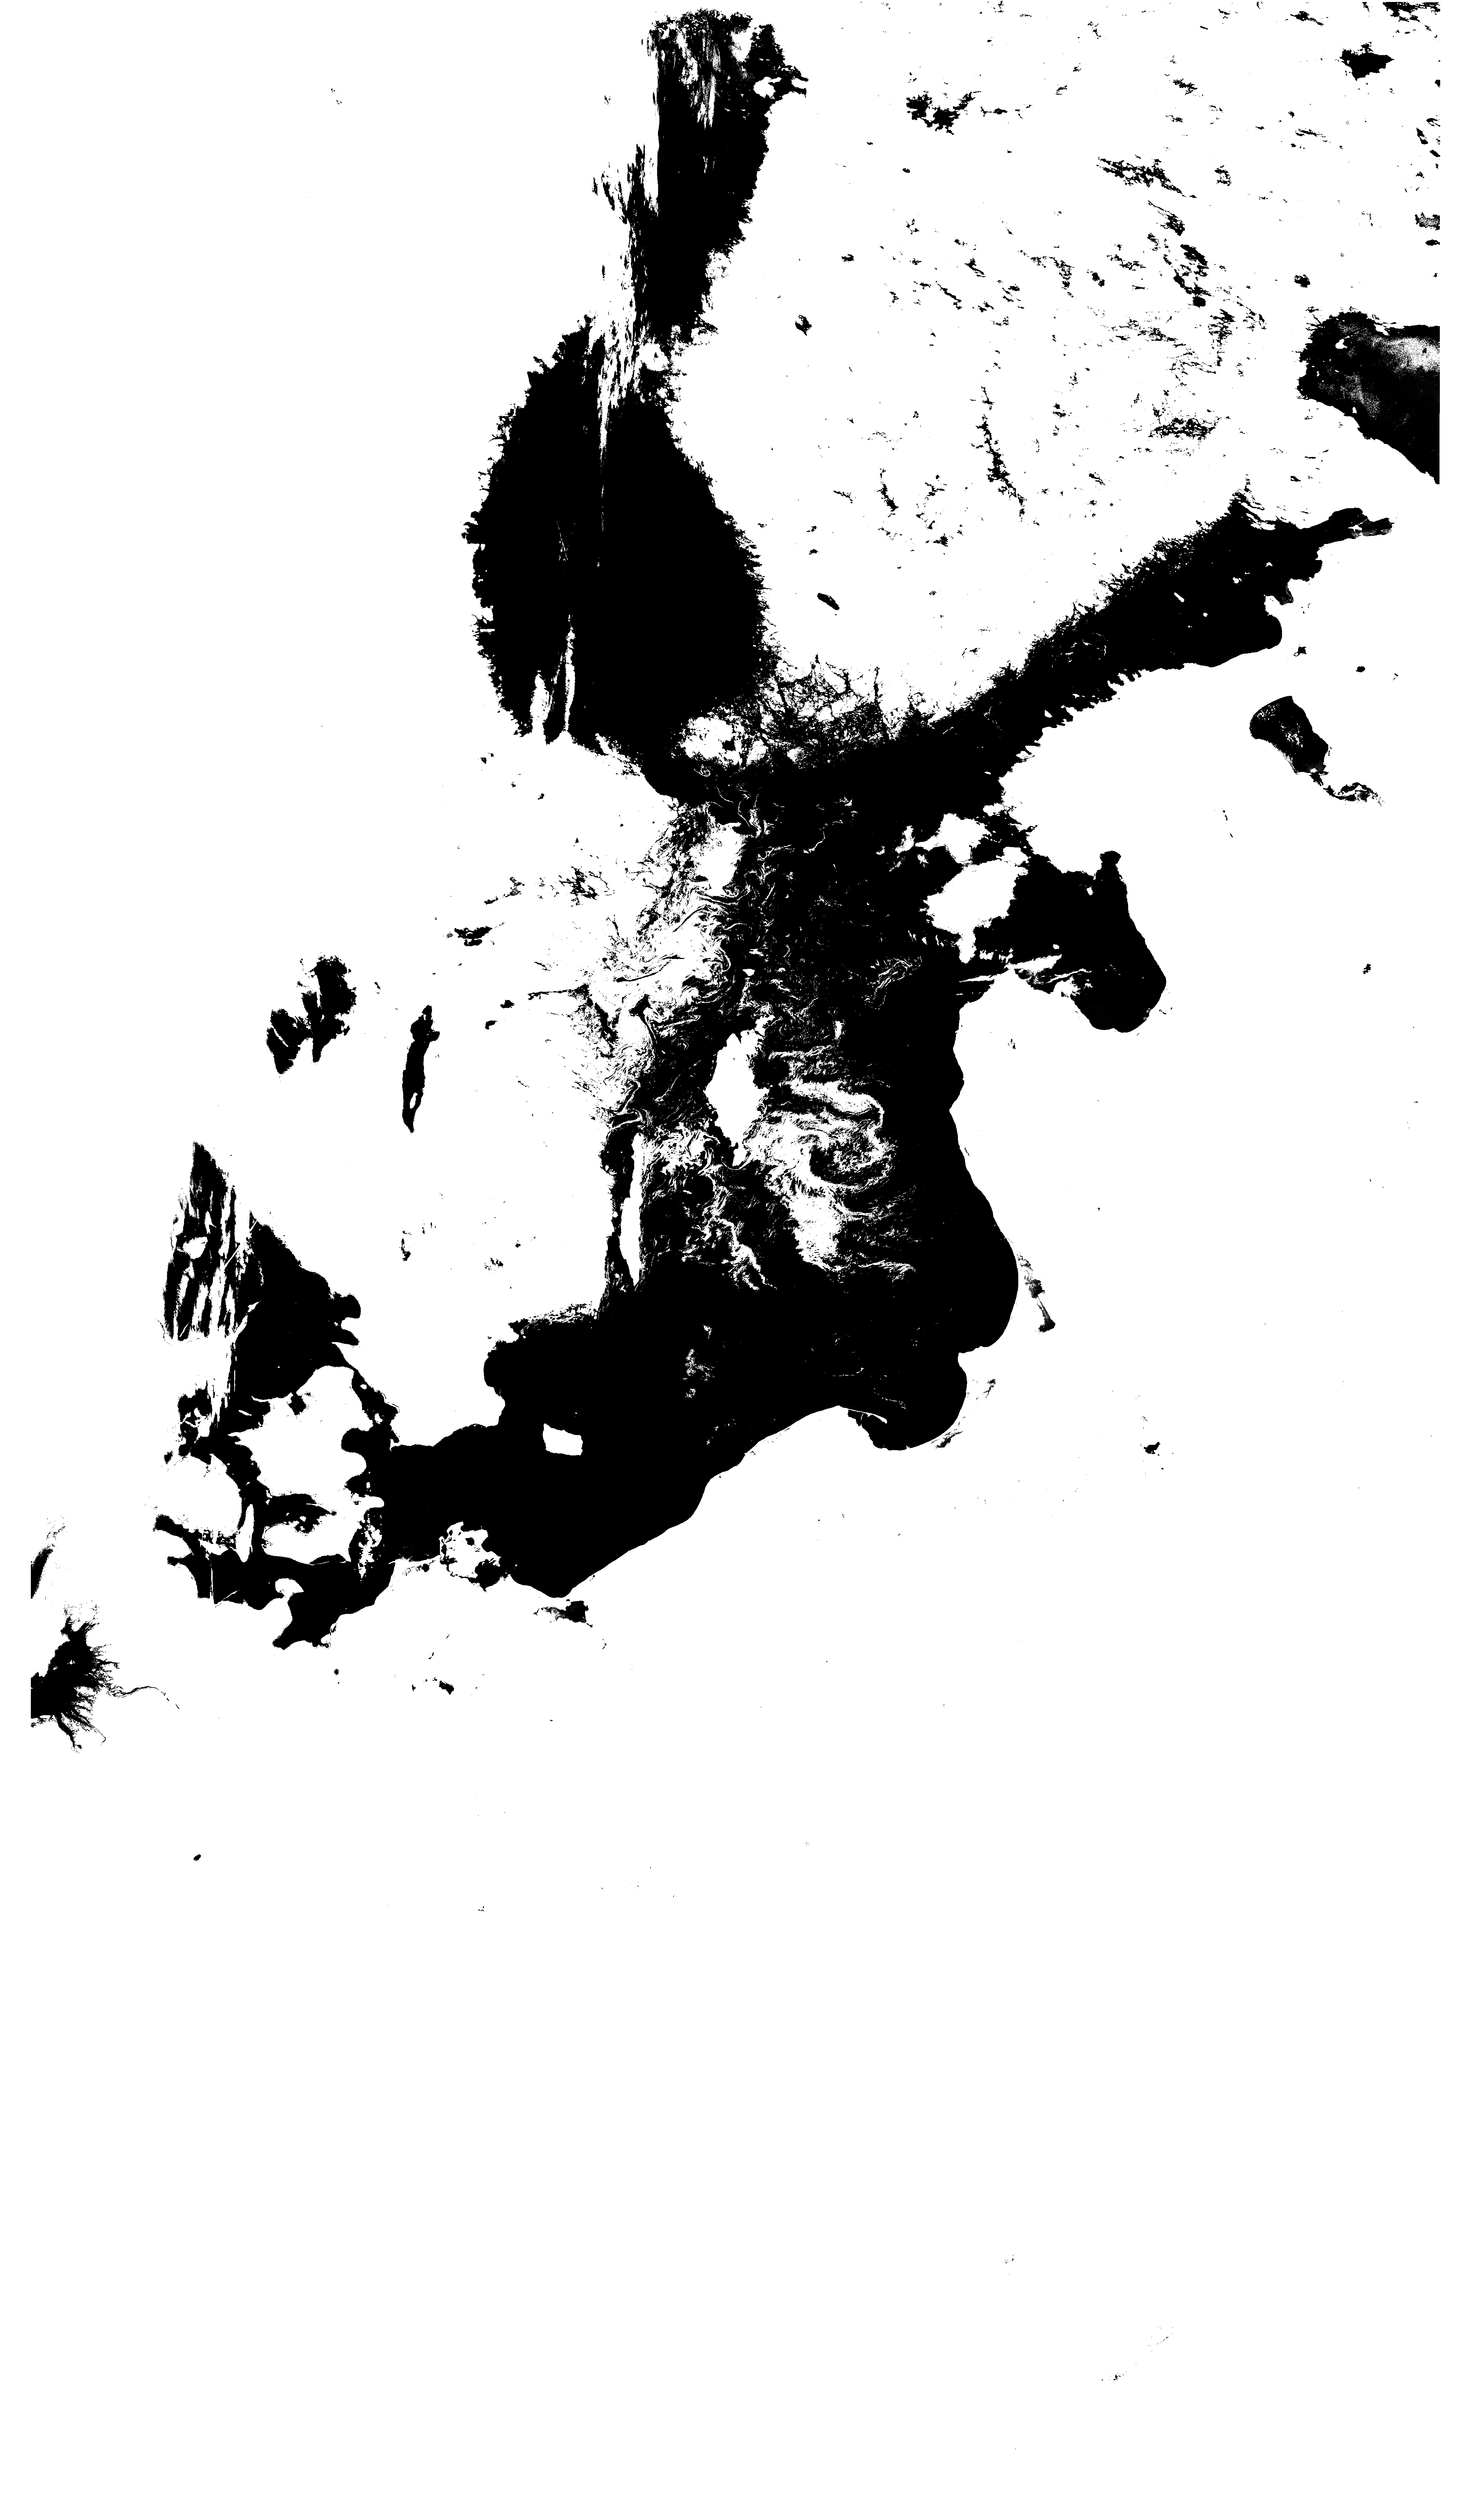

In [6]:
# Note that chlorophyll data are stored as logarithmic values.
scn['chl_nn'] = np.power(10, scn['chl_nn'])

scn.show('chl_nn')